In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Proyecto_Final/Proyecto_Final
!ls -a

In [ ]:
import torch
import torch.optim as optim
import torch.cuda as cuda
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from os.path import exists
from Dataset import FramesDataset
from convNet import convNet
from UNET import UNET

In [ ]:
BATCH = 3
EPOCHS = 10
LR = 2e-4
device = "cuda" if cuda.is_available() else "cpu"
dir_dataset = r'C:\Users\Mau\Desktop\proyectos\Proyecti_Final\dataset2'
dataset = FramesDataset(dir = dir_dataset, transform=transforms.ToTensor())
model = convNet(6,3).to(device)
optimizer = optim.Adam(model.parameters(), lr=LR)

In [ ]:
length = dataset.__len__()
test = length//10
train = length - test
trainset, testset = random_split(dataset,[train,test])
trainset = DataLoader(trainset, batch_size=BATCH, shuffle=True, pin_memory=True,num_workers=2)
testset = DataLoader(testset, batch_size=1, shuffle=True)

In [ ]:
lossFunction = torch.nn.SmoothL1Loss()
totalLoss = []
for epoch in range(EPOCHS):
    epochLoss = []
    for data in trainset:
        (F1,F3) ,F2, (img1, img3) = data
        input = torch.cat([F1.to(device), F3.to(device)], dim=1)
        output = model(input)
        loss  = lossFunction(output , F2.to(device))
        epochLoss.append(loss.item())
        loss.backward()
        optimizer. step()
        optimizer.zero_grad()
        del F1, F2, F3, loss, output,  img1, data
    print(sum(epochLoss)/len(epochLoss))
    totalLoss.append(sum(epochLoss)/len(epochLoss))


0.011613369850674644
0.007497955508297309
0.00697207797881371
0.00676152973008963
0.006568650982808321
0.006340011607583923
0.006251907226784776
0.006400156120653264
0.006123788667027838
0.005987625223351643


In [ ]:
data = []
data = next(iter(testset))
((F1,F3) ,F2, (img1, img3)) = data
cuda.reset_peak_memory_stats(device="cuda")
with torch.no_grad():
    output = model(torch.cat([F1.to(device), F3.to(device)], dim=1))
img1 = F1.numpy()[0].transpose(1,2,0)
img2 = F2.cpu().numpy()[0].transpose(1,2,0)
img3 = F3.numpy()[0].transpose(1,2,0)
generated = output.cpu().detach().numpy()[0].transpose(1,2,0)
del F1, F2, F3, output, data
cuda.reset_peak_memory_stats(device="cuda")

Text(0.5, 1.0, 'generated')

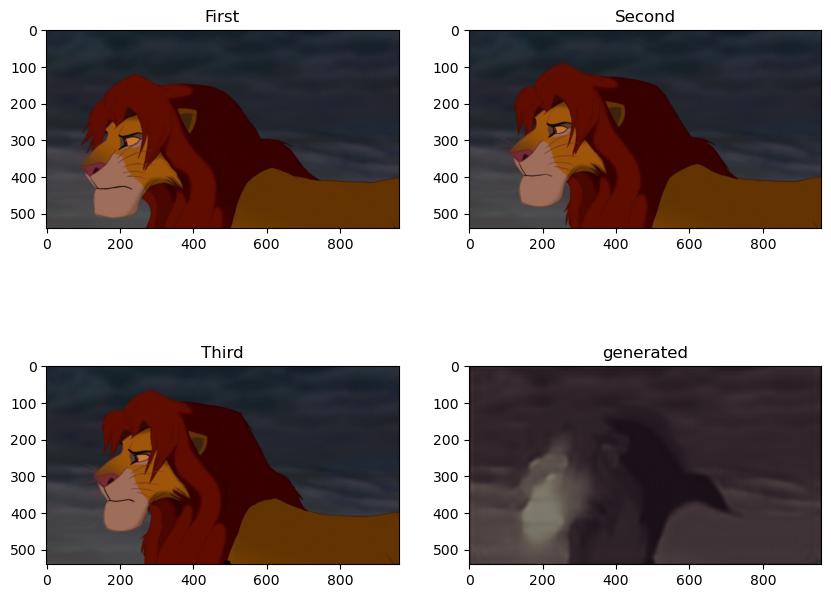

In [ ]:
fig = plt.figure(figsize=(10, 8))
fig.add_subplot(2, 2, 1)
plt.imshow(img1)
plt.title("First")
fig.add_subplot(2, 2, 2)
plt.imshow(img2)
plt.title("Second")
fig.add_subplot(2, 2, 3)
plt.imshow(img3)
plt.title("Third")
fig.add_subplot(2, 2, 4)
plt.imshow(generated)
plt.title("generated")